In [51]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [52]:
# TODO: Task 2 - Define the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations


In [53]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness, weights=(-1.0,-1.0) )
creator.create("Individual",list, fitness=creator.FitnessMin )

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [54]:
import random

In [55]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [56]:
#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)

In [57]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [58]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	551.911	3.77611
1  	213   	527.152	2.91103
2  	243   	523.617	2.85083
3  	232   	516.065	2.95467
4  	233   	507.571	2.77188
5  	218   	499.281	3.60384
6  	213   	497.336	5.2015 
7  	233   	496.281	2.88199
8  	219   	493.688	2.10281
9  	209   	486.892	2.10281
10 	224   	477.03 	2.62741
11 	230   	481.738	2.51689
12 	230   	482.037	6.56214
13 	217   	473.016	3.44111
14 	231   	472.628	1.92575
15 	250   	474.045	1.92575
16 	238   	464.396	1.92575
17 	236   	461.61 	1.92575
18 	225   	455.721	3.47427
19 	225   	444.189	4.1032 
20 	209   	432.177	1.14341
21 	232   	434.13 	1.92575
22 	237   	424.87 	1.92575
23 	217   	407.381	2.0729 
24 	227   	413.858	2.10684
25 	246   	403.415	1.20691
26 	233   	390.631	2.66056
27 	219   	379.186	2.66056
28 	229   	365.217	6.47353
29 	223   	360.274	7.73576
30 	238   	349.981	6.3518 
31 	225   	339.697	20.064 
32 	221   	333.919	5.157  
33 	243   	324.646	2.97471
34 	232   	318.184	3.04986
35 	244   	313.527	3.04386
3

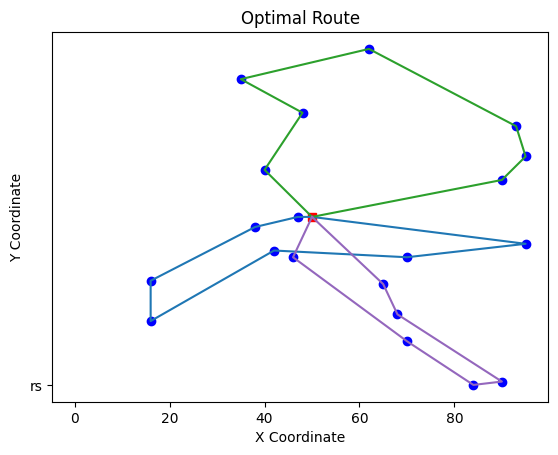

In [59]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
   main()